In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency, levene, shapiro, ttest_ind, mannwhitneyu

import warnings
warnings.filterwarnings('ignore')

**Data dictionary:**

- `Index`: Row index
- `user id`: User ID (unique)
- `test group`: If "ad" the person saw the advertisement, if "psa" they only saw the public service announcement
- `converted`: If a person bought the product then True, else is False
- `total ads`: Amount of ads seen by person
- `most ads day`: Day that the person saw the biggest amount of ads
- `most ads hour`: Hour of day that the person saw the biggest amount of ads

In [2]:
df = pd.read_csv('marketing_AB.csv')

In [3]:
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,588101.0,2.940500e+05,169770.279667,0.0,147025.0,294050.0,441075.0,588100.0
user id,588101.0,1.310692e+06,202225.983128,900000.0,1143190.0,1313725.0,1484088.0,1654483.0
total ads,588101.0,2.482088e+01,43.715181,1.0,4.0,13.0,27.0,2065.0
most ads hour,588101.0,1.446906e+01,4.834634,0.0,11.0,14.0,18.0,23.0


# Data Cleaning

Column names should be consistent and without spaces, I will replace the spaces between charaters with underscores.

In [6]:
# rename columns
df.rename(columns=lambda x: x.strip().replace(' ','_'), inplace=True)

In [7]:
# check if there is any missing values in the data frame
df.isna().sum()

Unnamed:_0       0
user_id          0
test_group       0
converted        0
total_ads        0
most_ads_day     0
most_ads_hour    0
dtype: int64

In [8]:
# check if there is any duplicated data in the data frame
df.duplicated().sum()

0

Most of the statistical methods and tests are designed to work with numbers rather than boolean type. Converting the values of `converted` column allows me to use a wider range of statistical tools and techniques.

In [ ]:
# # convert 'True' to 1 and 'False' to 0
# df['converted'].apply(lambda x: 1 if x==Ture else 0,inplace=true)

Column `Unnamed:_0` seems to contain the same values as the index column, and it serve the same function as unique identifier as the index column. Let's check if it is save to be dropped.

In [9]:
# check number of duplicates in the `Unnamed:_0` column
df['Unnamed:_0'].duplicated().sum()

0

In [10]:
# check if all the values in `user_id` are unique
df['user_id'].duplicated().sum()

0

All the data in the `user_id` column is unique, and we do not need another unique identifier, so we drop the `Unnanmed_0` column.

In [11]:
# drop `Unnamed:_0` column
df.drop(columns='Unnamed:_0',inplace=True)

In [13]:
# check unique values in the columns
features = df.drop(columns='user_id')

for col in features:
    print(f"\n{df[col].value_counts()}")


ad     564577
psa     23524
Name: test_group, dtype: int64

False    573258
True      14843
Name: converted, dtype: int64

1       56606
2       39827
5       29303
3       28661
4       23426
        ...  
1302        1
1035        1
716         1
1014        1
729         1
Name: total_ads, Length: 807, dtype: int64

Friday       92608
Monday       87073
Sunday       85391
Thursday     82982
Saturday     81660
Wednesday    80908
Tuesday      77479
Name: most_ads_day, dtype: int64

13    47655
12    47298
11    46210
14    45648
15    44683
10    38939
16    37567
17    34988
18    32323
9     31004
19    30352
21    29976
20    28923
22    26432
23    20166
8     17627
7      6405
0      5536
2      5333
1      4802
3      2679
6      2068
5       765
4       722
Name: most_ads_hour, dtype: int64


In [14]:
df.head()

,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


# EDA

## Univariate Analysis

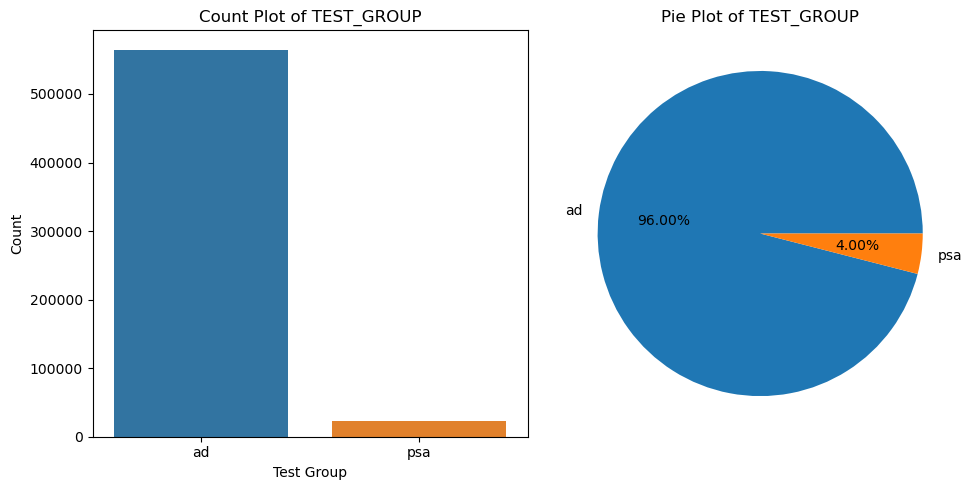

In [75]:
feature = 'test_group'

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(x=feature,data=df)
plt.title(f'Count Plot of {feature.upper()}')
plt.xlabel('Test Group')
plt.ylabel('Count')

plt.subplot(1,2,2)
plt.pie(df[feature].value_counts(),labels=df[feature].value_counts().index, autopct='%.2f%%')
plt.title(f'Pie Plot of {feature.upper()}')
plt.tight_layout()
plt.show()

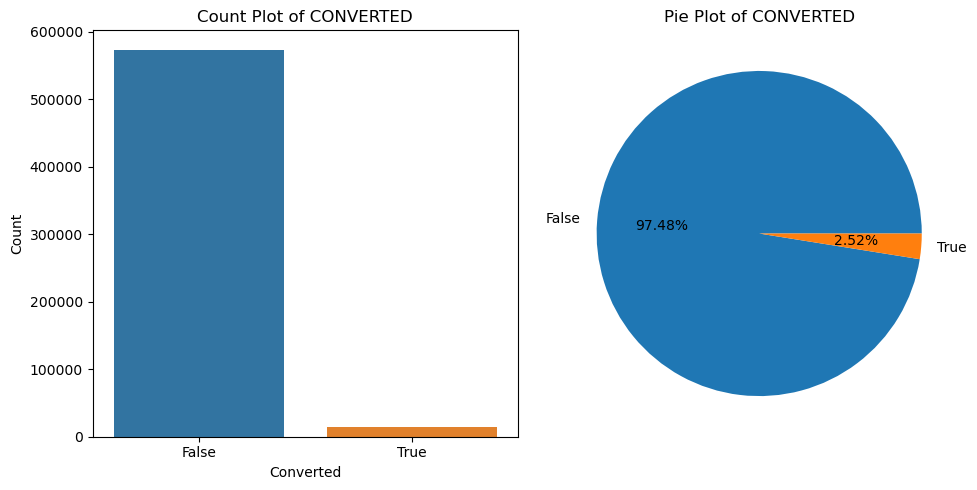

In [87]:
feature = 'converted'

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(x=feature,data=df)
plt.title(f'Count Plot of {feature.upper()}')
plt.xlabel('Converted')
plt.ylabel('Count')

plt.subplot(1,2,2)
plt.pie(df[feature].value_counts(),labels=df[feature].value_counts().index, autopct='%.2f%%')
plt.title(f'Pie Plot of {feature.upper()}')
plt.tight_layout()
plt.show()

In [40]:
# check the statistics of `total_ads` to determine a range of value for a clearer view for the plots
df['total_ads'].describe()

count    588101.000000
mean         24.820876
std          43.715181
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: total_ads, dtype: float64

75% of the data is distributed at 27, I will use 50 for the threshold.

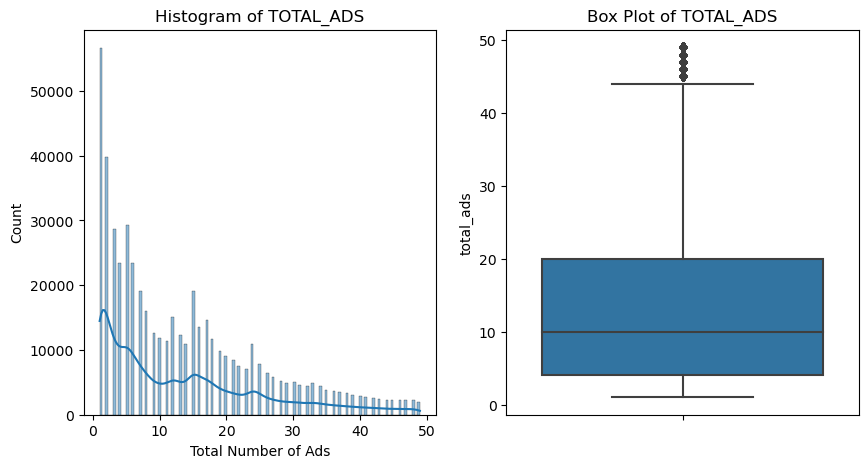

In [59]:
feature = 'total_ads'

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.histplot(x=feature, data=df[df[feature]<50], kde=True)
plt.title(f'Histogram of {feature.upper()}')
plt.xlabel('Total Number of Ads')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.boxplot(y=feature, data=df[df[feature]<50])
plt.title(f'Box Plot of {feature.upper()}')
plt.show()

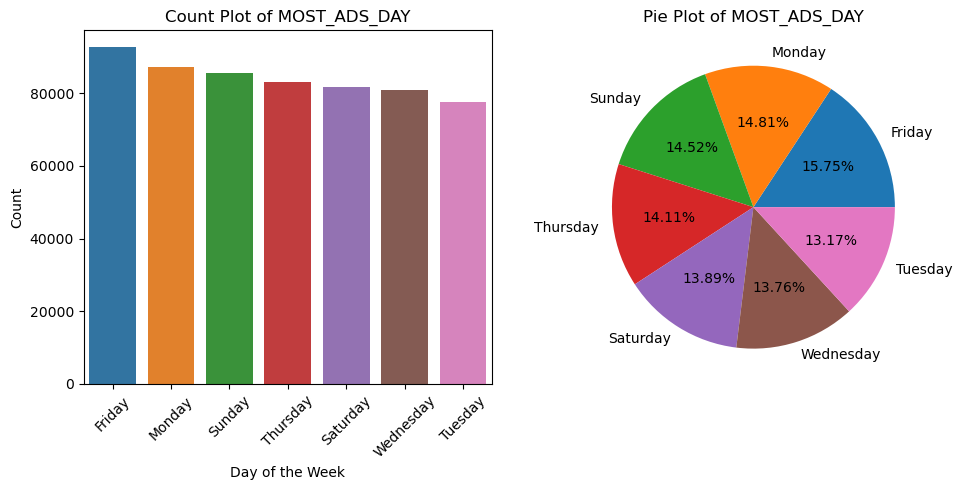

In [98]:
feature = 'most_ads_day'
counts = df[feature].value_counts()

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.barplot(x=counts.index, y=counts.values)
plt.title(f'Count Plot of {feature.upper()}')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1,2,2)
plt.pie(df[feature].value_counts(),labels=df[feature].value_counts().index, autopct='%.2f%%')
plt.title(f'Pie Plot of {feature.upper()}')
plt.tight_layout()
plt.show()

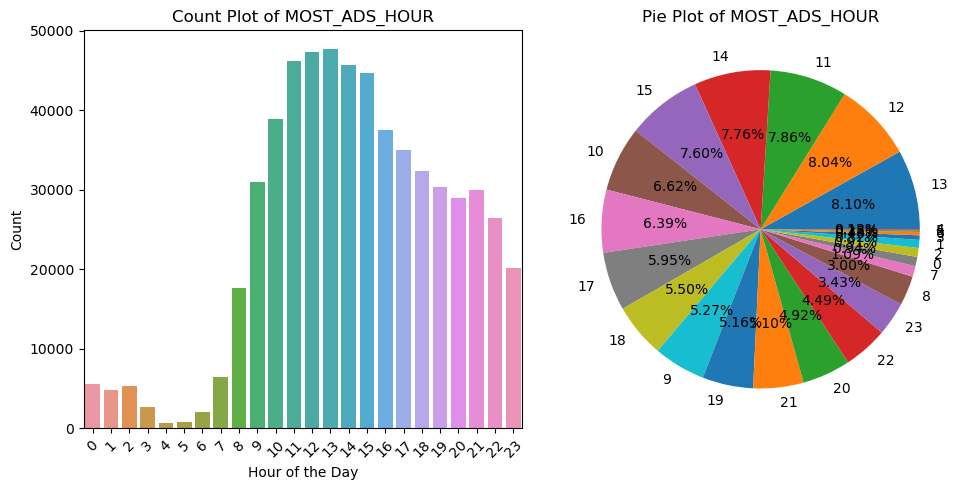

In [100]:
feature = 'most_ads_hour'
counts = df[feature].value_counts()

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.barplot(x=counts.index, y=counts.values)
plt.title(f'Count Plot of {feature.upper()}')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1,2,2)
plt.pie(df[feature].value_counts(),labels=df[feature].value_counts().index, autopct='%.2f%%')
plt.title(f'Pie Plot of {feature.upper()}')
plt.tight_layout()
plt.show()

## Bivariate Analysis

In [176]:
# create cross table against the `test_group`
feature = 'test_group'

cross_table = pd.crosstab(df[feature], df['converted'], normalize='index')
cross_table

converted,False,True
test_group,,
ad,0.974453,0.025547
psa,0.982146,0.017854


<Figure size 800x500 with 0 Axes>

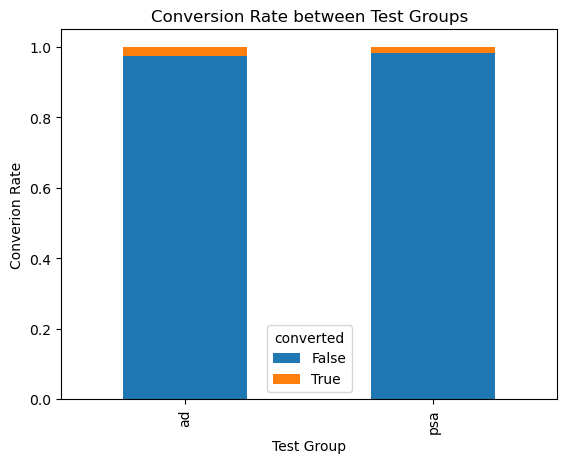

In [177]:
plt.figure(figsize=(8,5))

cross_table.plot(kind='bar', stacked=True)
plt.title('Conversion Rate between Test Groups')
plt.xlabel('Test Group')
plt.ylabel('Converion Rate')

plt.show()

There are slightly more customers bought the product after seeing the ads than those who did not see the ads.

In [149]:
# create pivot table against the test group
feature = 'total_ads'

# set the `total_ads` less than 50 for a closer observation
pivot_table = df[df[feature]<50].pivot_table(columns='converted', values=feature, aggfunc='mean')
pivot_table

converted,False,True
total_ads,13.521606,26.864967


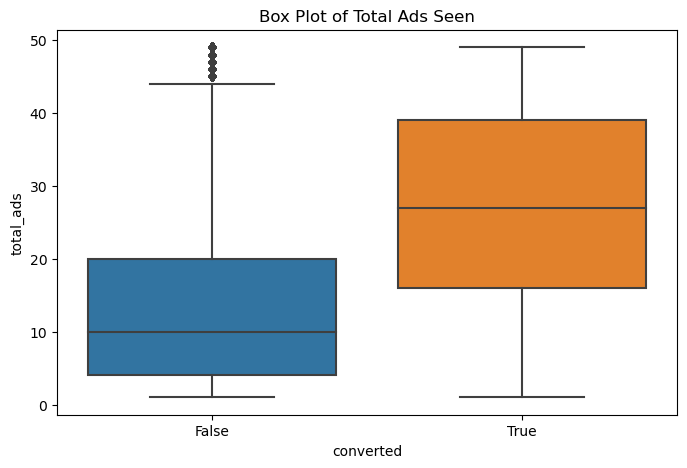

In [153]:
plt.figure(figsize=(8,5))

sns.boxplot(x='converted', y=feature, data=df[df[feature]<50])
plt.title('Box Plot of Total Ads Seen')

plt.show()

The average of ads were seen by converted customers (26.9) are significantly higher than non-converted customers (13.5). 

In [180]:
# create cross table against the `most_ads_day`
feature = 'most_ads_day'

cross_table = pd.crosstab(df[feature], df['converted'], normalize='index').sort_values(by=True,ascending=False)
cross_table

converted,False,True
most_ads_day,,
Monday,0.967188,0.032812
Tuesday,0.970160,0.029840
Wednesday,0.975058,0.024942
Sunday,0.975524,0.024476
Friday,0.977788,0.022212
Thursday,0.978429,0.021571
Saturday,0.978949,0.021051


<Figure size 800x500 with 0 Axes>

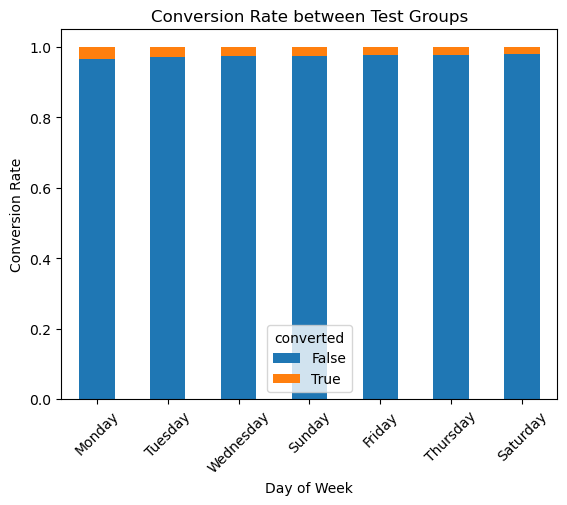

In [181]:
plt.figure(figsize=(8,5))

cross_table.plot(kind='bar', stacked=True)
plt.title('Conversion Rate between Test Groups')
plt.xlabel('Day of Week')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=45)

plt.show()

In [182]:
# create cross table against the `most_ads_day`
feature = 'most_ads_hour'

cross_table = pd.crosstab(df[feature], df['converted'], normalize='index').sort_values(by=True,ascending=False)
cross_table

converted,False,True
most_ads_hour,,
16,0.969228,0.030772
20,0.970197,0.029803
15,0.970347,0.029653
21,0.971077,0.028923
17,0.971790,0.028210
14,0.971937,0.028063
18,0.972620,0.027380
19,0.973280,0.026720
22,0.973895,0.026105


<Figure size 800x500 with 0 Axes>

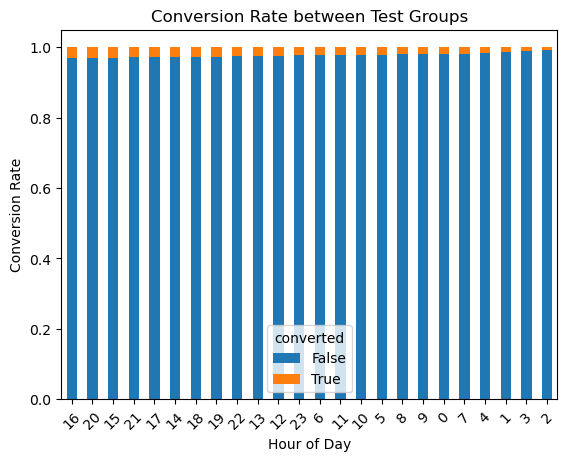

In [183]:
plt.figure(figsize=(8,5))

cross_table.plot(kind='bar', stacked=True)
plt.title('Conversion Rate between Test Groups')
plt.xlabel('Hour of Day')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=45)

plt.show()

The top three times of day with the highest conversion rates are 4:00 PM, 8:00 PM, and 3:00 PM.

# Statitical Tests

## Categorical Feature

The Chi-sqaure test is a useful tool commonly ued in A/B testig to determine if there are significant differences between two categorical variables. It helps ascertain whether the differences in the outcomes observed in the two groups of `converted` can be attributed to chance or if they are statistically significant.

**Null Hypothesis:**
- **$H_0$: There is no statistically significant difference in conversion across the group.**
- **$H_1$: There is a statistically significant difference in conversion across the group.**

In [184]:
df.head()

,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


In [222]:
# list of categorical features
cat_features = ['test_group', 'most_ads_day', 'most_ads_hour']
# determine the p-value threshold
alpha = 0.05

# loop the chi2 test through the features
for variable in cat_features:
    # we do not need to run the chi2 test against the target feature itself
    if variable!='converted':
        
        # create contigency table
        contigency_tab = pd.crosstab(df[variable], df['converted'])
        
        # instantiate chi2 test
        chi2, p, _, _ = chi2_contingency(contigency_tab)
        
        # check the significance level
        if p < alpha:
            print(f"\nThe p-value is: {p}. We reject the null hypothesis test, and there is significant difference across {variable} between the two converted groups.")
        else:
            print(f"\nThe p-value is: {p}. We fail to rejct the null hypothesis test, and there is no significant difference in conversion across {variable} between the two converted groups.")        


The p-value is: 1.9989623063390075e-13. We reject the null hypothesis test, and there is significant difference across test_group between the two converted groups.

The p-value is: 1.932184379244731e-85. We reject the null hypothesis test, and there is significant difference across most_ads_day between the two converted groups.

The p-value is: 8.027629823696771e-77. We reject the null hypothesis test, and there is significant difference across most_ads_hour between the two converted groups.


## Numerical Feature

There is a caveat in performing statistical tests for numerical features, we first need to test for assumptions for normality and Homogeneity of variances.

**Null Hypothesis (Normality):**
- **$H_0$: The feature is normally distributed.**
- **$H_1$: The feature is not normally distributed.**

In [221]:
# check for normailty assumption
shapiro_test = stats.shapiro(df['total_ads'])

# check the significance level
if shapiro_test.pvalue < alpha:
    print(f"The p-value is: {shapiro_test.pvalue}. We reject the null hypothesis, and 'total_ads' is not normally distributed.")
else:
    print(f"The p-value is: {shapiro_test.pvalue}. We failed reject the null hypothesis, and 'total_ads' is normally distributed.")

The p-value is: 0.0. We reject the null hypothesis, and 'total_ads' is not normally distributed.


**Null Hypothesis (Homogeneity of Variances):**
- **$H_0$: The variances of the feature between  is homogeneous.**
- **$H_1$: The variances of the feature the two groups is not homogeneous.**

In [211]:
# check for homogeneity of varainces assumption
levene_test = levene(df[df['converted']== True]['total_ads'], df[df['converted']== False]['total_ads'])

# check the significance level
if levene_test.pvalue < alpha:
    print(f"The p-value is: {levene_test.pvalue}. We reject the null hypothesis, and variances of 'total_ads' between two converted groups is not homogeneous.")
else:
    print(f"The p-value is: {levene_test.pvalue}. We failed reject the null hypothesis, and variances of 'total_ads' between two converted groups is homogeneous.")

The p-value is: 0.0. We reject the null hypothesis, and variances of 'total_ads' between two converted groups is not homogeneous.


Both assumptions are violated, Mann-Whitney U Test should be considered.

**Null Hypothesis:**

- **$H_0$: The two independent samples (converted group and non-converted group) come from the same distribution, meaning their medians are the same.**
- **$H_1$: There is a difference in the distribution from which the two independent samples (converted group and non-converted group) are drawn.**

In [225]:
# Mann-Whitney U Test
u_statistics, p_value = mannwhitneyu(df[df['converted']== True]['total_ads'], df[df['converted']== False]['total_ads'])

# check the significance level
if p_value < alpha:
     print(f"The p-value is: {p_value}. We reject the null hypothesis, and the distributions of the two sample groups are statistically different.")
else:
    print(f"The p-value is: {p_value}. We failed reject the null hypothesis, and the distribution of the two converted groups is the same.")

The p-value is: 0.0. We reject the null hypothesis, and the distributions of the two sample groups are statistically different.


# Conclusion

After both the visual and statistical analysis, there is a notable difference in conversion between the two test groups:
- customers who saw the ads are more likely to buy the products in result
- the conversion rate does vary among different day of the week and hour of the day
- the total number of ads seen by converted and non-converted customers is statistically different   